In [1]:
# Image rendering config
#%config InlineBackend.figure_format = 'svg'

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
import pydotplus

In [2]:
df_train = pd.read_csv('titanic/train_preprocessed.csv')

In [3]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'TravelAlone'], dtype='object')

In [4]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [5]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Embarked', 'Sex']

cat_features = df_train[cat_cols].apply(LabelEncoder().fit_transform)

for col in cat_cols:
    df_train.drop(col, axis=1, inplace=True)

df_train = pd.concat([df_train, cat_features], axis=1)

In [6]:
df_train.head()

,Survived,Pclass,Age,Fare,TravelAlone,Embarked,Sex
0,0,3,22.0,7.2500,0,2,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,1,2,0
3,1,1,35.0,53.1000,0,2,0
4,0,3,35.0,8.0500,1,2,1


In [7]:
feature_names=["Age","Fare","TravelAlone","Pclass","Embarked","Sex"] 
X = df_train[feature_names]
y = df_train["Survived"]

In [8]:
# Create and fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=3, max_depth=3)
model = clf.fit(X, y)

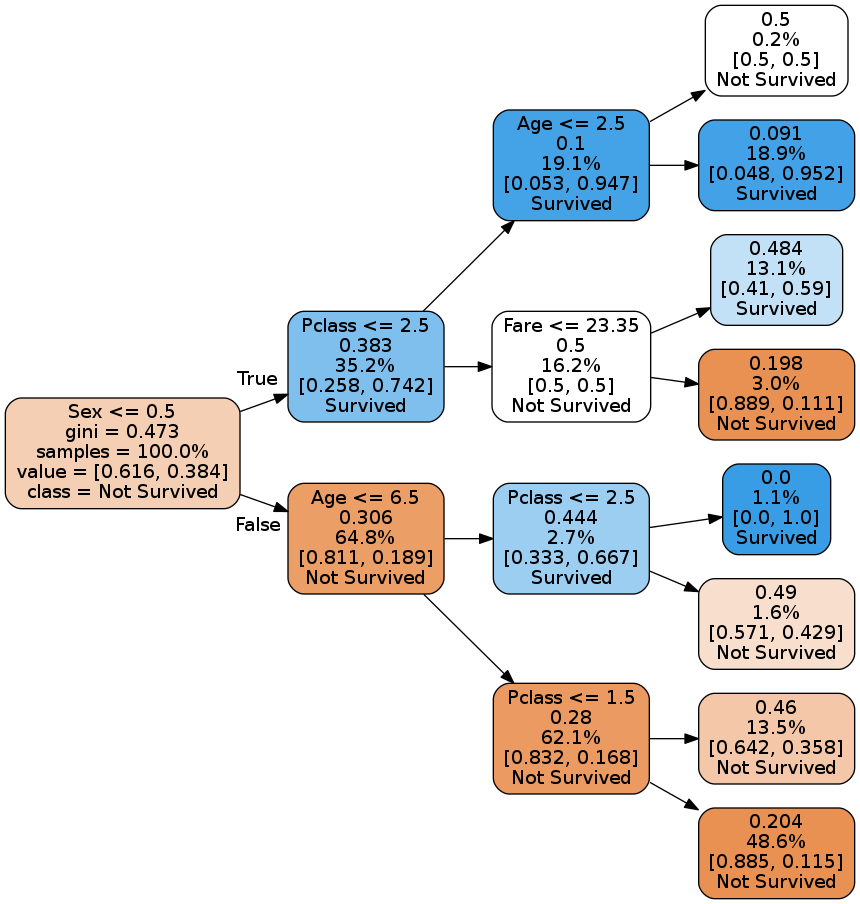

In [9]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=["Not Survived", "Survived"],
                                rotate=True, label='root', filled=True, 
                                proportion=True, rounded=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [10]:
graph.write_png("titanic.png")

True

In [11]:
import lime
import lime.lime_tabular

In [12]:
predict_fn = lambda x: clf.predict_proba(x).astype(float)

explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=feature_names,
                                                    class_names=['Not Survived', 'Survived'],
                                                    categorical_features=df_train[cat_cols],
                                                    categorical_names=cat_cols,
                                                    kernel_width=3)

In [13]:
exp=explainer.explain_instance(X.values[1], predict_fn, num_features=len(feature_names))
exp.show_in_notebook(show_all=False)